In [1]:
import re 
import nltk
import string
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [2]:
pd.set_option('display.max_colwidth',200)
warnings.filterwarnings('ignore',category=DeprecationWarning)

In [3]:
train=pd.read_csv('train_E6oV3lV.csv')
test=pd.read_csv('test_tweets_anuFYb8.csv')

In [4]:
train[train['label']==0].head(10)

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run
1,2,0,@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦
4,5,0,factsguide: society now #motivation
5,6,0,[2/2] huge fan fare and big talking before they leave. chaos and pay disputes when they get there. #allshowandnogo
6,7,0,@user camping tomorrow @user @user @user @user @user @user @user dannyâ¦
7,8,0,the next school year is the year for exams.ð¯ can't think about that ð­ #school #exams #hate #imagine #actorslife #revolutionschool #girl
8,9,0,we won!!! love the land!!! #allin #cavs #champions #cleveland #clevelandcavaliers â¦
9,10,0,@user @user welcome here ! i'm it's so #gr8 !


In [5]:
train[train['label']==1].head(10)


,id,label,tweet
13,14,1,@user #cnn calls #michigan middle school 'build the wall' chant '' #tcot
14,15,1,no comment! in #australia #opkillingbay #seashepherd #helpcovedolphins #thecove #helpcovedolphins
17,18,1,retweet if you agree!
23,24,1,@user @user lumpy says i am a . prove it lumpy.
34,35,1,it's unbelievable that in the 21st century we'd need something like this. again. #neverump #xenophobia
56,57,1,@user lets fight against #love #peace
68,69,1,ð©the white establishment can't have blk folx running around loving themselves and promoting our greatness
77,78,1,"@user hey, white people: you can call people 'white' by @user #race #identity #medâ¦"
82,83,1,how the #altright uses &amp; insecurity to lure men into #whitesupremacy
111,112,1,@user i'm not interested in a #linguistics that doesn't address #race &amp; . racism is about #power. #raciolinguistics bringsâ¦


In [6]:
train.label.value_counts()

0    29720
1     2242
Name: label, dtype: int64

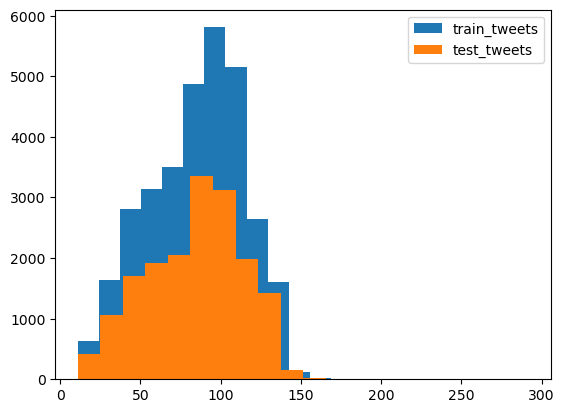

In [7]:
length_train=train['tweet'].str.len()
length_test=test['tweet'].str.len()
plt.hist(length_train,bins=20,label="train_tweets")
plt.hist(length_test,bins=20,label="test_tweets")
plt.legend()
plt.show()
# %%


In [8]:
commbo=train.append(test,ignore_index=True)
commbo.shape

C:\Program Files\KMSpico\temp\ipykernel_11272\3233224021.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  commbo=train.append(test,ignore_index=True)


(49159, 3)

In [9]:
def remove_pattern(input_txt,pattern):
    r=re.findall(pattern,input_txt)
    for i in r:
        input_txt=re.sub(i,'',input_txt)
    return input_txt

- ### **removing twitter handles**

In [10]:
commbo['tidy_tweet']=np.vectorize(remove_pattern)(commbo['tweet'],"@[\w]*")

In [11]:
commbo.head()

,id,label,tweet,tidy_tweet
0,1,0.0,@user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run,when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run
1,2,0.0,@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked,thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked
2,3,0.0,bihday your majesty,bihday your majesty
3,4,0.0,#model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦,#model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦
4,5,0.0,factsguide: society now #motivation,factsguide: society now #motivation


In [12]:
commbo['tidy_tweet']= commbo['tidy_tweet'].str.replace("[^a-zA-Z#]"," ")
commbo.head()

C:\Program Files\KMSpico\temp\ipykernel_11272\2891836352.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  commbo['tidy_tweet']= commbo['tidy_tweet'].str.replace("[^a-zA-Z#]"," ")


,id,label,tweet,tidy_tweet
0,1,0.0,@user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run,when a father is dysfunctional and is so selfish he drags his kids into his dysfunction #run
1,2,0.0,@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked,thanks for #lyft credit i can t use cause they don t offer wheelchair vans in pdx #disapointed #getthanked
2,3,0.0,bihday your majesty,bihday your majesty
3,4,0.0,#model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦,#model i love u take with u all the time in ur
4,5,0.0,factsguide: society now #motivation,factsguide society now #motivation


In [13]:

commbo['tidy_tweet']=commbo['tidy_tweet'].apply(lambda x:' '.join([w for w in x.split() if len(w)>3]))
commbo.head()

,id,label,tweet,tidy_tweet
0,1,0.0,@user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run,when father dysfunctional selfish drags kids into dysfunction #run
1,2,0.0,@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked,thanks #lyft credit cause they offer wheelchair vans #disapointed #getthanked
2,3,0.0,bihday your majesty,bihday your majesty
3,4,0.0,#model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦,#model love take with time
4,5,0.0,factsguide: society now #motivation,factsguide society #motivation


- text Normalization

In [14]:

tokenized_tweet=commbo['tidy_tweet'].apply(lambda x:x.split())
tokenized_tweet.head()

0                [when, father, dysfunctional, selfish, drags, kids, into, dysfunction, #run]
1    [thanks, #lyft, credit, cause, they, offer, wheelchair, vans, #disapointed, #getthanked]
2                                                                     [bihday, your, majesty]
3                                                            [#model, love, take, with, time]
4                                                          [factsguide, society, #motivation]
Name: tidy_tweet, dtype: object

In [15]:
from nltk.stem.porter import *
stemmer=PorterStemmer()
tokenized_tweet=tokenized_tweet.apply(lambda x:  [stemmer.stem(i) for i in x])

In [16]:
for i in range(len(tokenized_tweet)):
    tokenized_tweet[i]=' '.join(tokenized_tweet[i])
    commbo['tidy_tweet']=tokenized_tweet

In [17]:
all_words=' '.join([text for text in commbo['tidy_tweet']])


In [18]:
print(all_words)

when father dysfunct selfish drag kid into dysfunct #run thank #lyft credit caus they offer wheelchair van #disapoint #getthank bihday your majesti #model love take with time factsguid societi #motiv huge fare talk befor they leav chao disput when they there #allshowandnogo camp tomorrow danni next school year year exam think about that #school #exam #hate #imagin #actorslif #revolutionschool #girl love land #allin #cav #champion #cleveland #clevelandcavali welcom here #ireland consum price index climb from previou #blog #silver #gold #forex selfish #orlando #standwithorlando #pulseshoot #orlandoshoot #biggerproblem #selfish #heabreak #valu #love daddi today day #gettingf #cnn call #michigan middl school build wall chant #tcot comment #australia #opkillingbay #seashepherd #helpcovedolphin #thecov #helpcovedolphin ouch junior angri #got #junior #yugyoem #omg thank have paner #thank #posit retweet agre #friday smile around user #cooki make peopl know essenti oil made chemic #euro peopl b

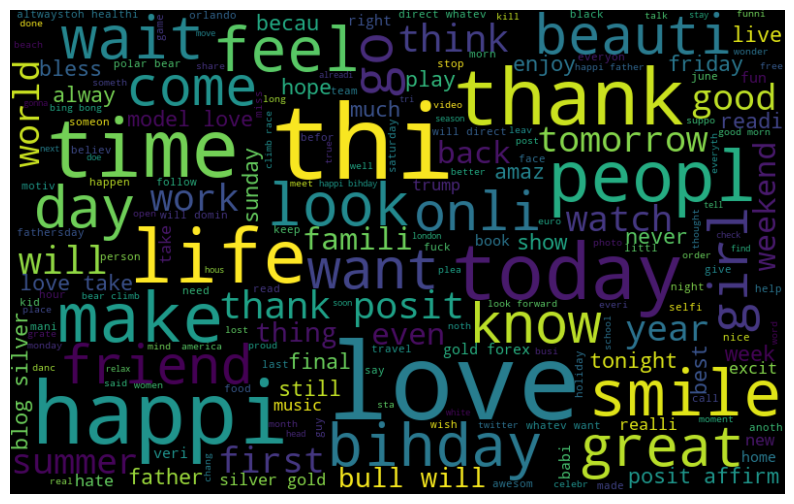

In [19]:
from wordcloud import WordCloud
wordcloud=WordCloud(width=800,height=500,random_state=21,max_font_size=110).generate(all_words)
plt.figure(figsize=(10,8))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.show()

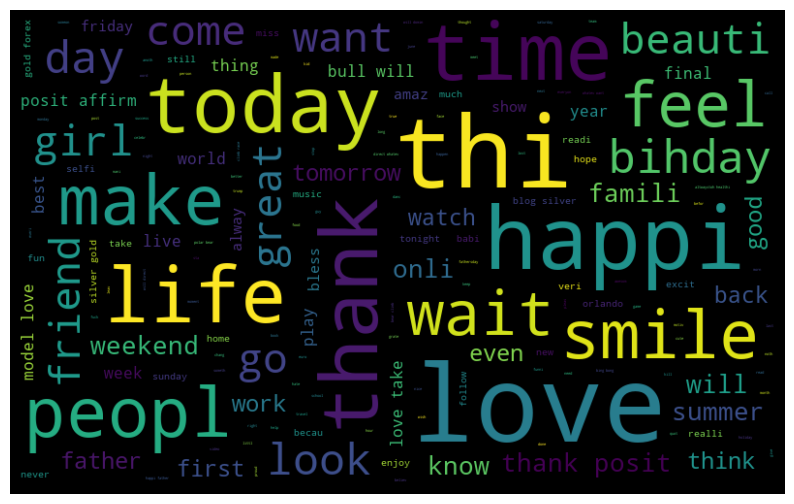

In [20]:
normal_words =' '.join([text for text in commbo ['tidy_tweet'][commbo['label']==0]])
wordcloud = WordCloud(  height=500, random_state=21,width=800,max_font_size=110,margin=22). generate(normal_words) 
plt.figure(figsize=(10,8))

plt.imshow(wordcloud,interpolation='bilinear')
plt.axis( 'off') 
plt. show()

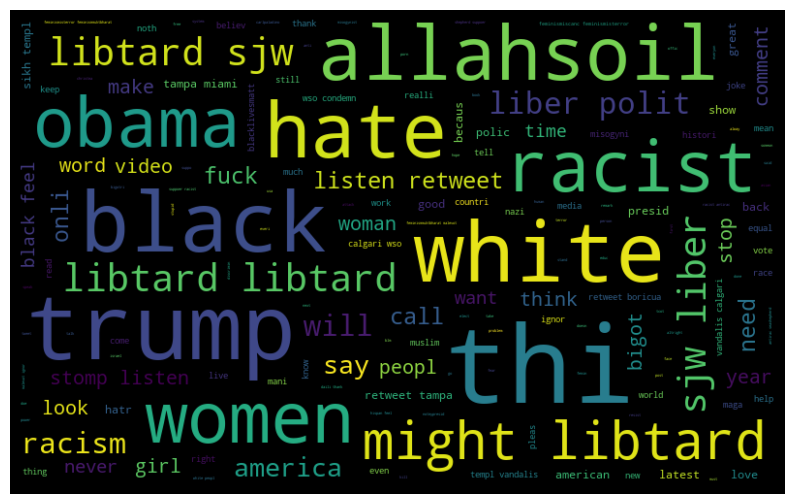

In [21]:
negative_words =' '.join([text for text in commbo ['tidy_tweet'][commbo['label']==1]])
wordcloud = WordCloud(  height=500, random_state=21,width=800,max_font_size=110,margin=22). generate(negative_words) 
plt.figure(figsize=(10,8))

plt.imshow(wordcloud,interpolation='bilinear')
plt.axis( 'off') 
plt. show()

In [22]:
def hashtag_extract(x):
    hashtags=[]
    for i in x:
        ht=re.findall(r"#(\w+)",i)
        hashtags.append(ht)
    return hashtags

Ht_regular=hashtag_extract(commbo ['tidy_tweet'][commbo['label']==0])
Ht_negative=hashtag_extract(commbo ['tidy_tweet'][commbo['label']==1])
Ht_regular=sum(Ht_regular,[])
Ht_negative=sum(Ht_negative,[])


In [23]:
Ht_regular
print(Ht_negative)

['cnn', 'michigan', 'tcot', 'australia', 'opkillingbay', 'seashepherd', 'helpcovedolphin', 'thecov', 'helpcovedolphin', 'neverump', 'xenophobia', 'love', 'peac', 'race', 'ident', 'med', 'altright', 'whitesupremaci', 'linguist', 'race', 'power', 'raciolinguist', 'brexit', 'peopl', 'trump', 'republican', 'michelleobama', 'knick', 'golf', 'jewishsupremacist', 'libtard', 'sjw', 'liber', 'polit', 'trash', 'hate', 'stereotyp', 'prejudic', 'hope', 'hate', 'conflict', 'pol', 'bluelivesmatt', 'draintheswamp', 'ferguson', 'antisemit', 'hocoschool', 'columbiamd', 'hocomd', 'nazi', 'hatr', 'bigotri', 'libtard', 'sjw', 'liber', 'polit', 'fyi', 'tcot', 'topoli', 'blacklivesmatt', 'ushistori', 'eugen', 'biher', 'bigotri', 'altright', 'potu', 'theresist', 'crime', 'offic', 'black', 'retweet', 'tampa', 'miami', 'allahsoil', 'prais', 'cleveland', 'rnc', 'white', 'tamirric', 'rip', 'bigot', 'blacklivesmatt', 'feminismiscanc', 'feminismisterror', 'feminismmuktbharat', 'malevot', 'prowar', 'anti', 'islam',

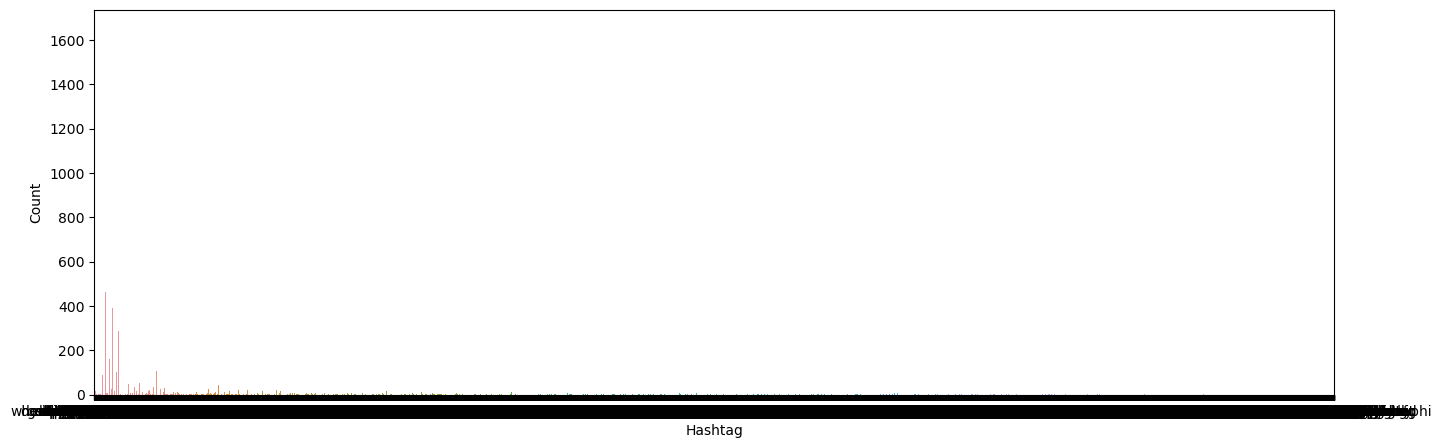

In [24]:
a=nltk.FreqDist(Ht_regular)
d=pd.DataFrame({'Hashtag':list(a.keys()),'Count':list(a.values())})
d.nlargest(columns='Count',n=20)
plt.figure(figsize=(16,5))
ax=sns.barplot(data=d,x='Hashtag',y='Count')
ax.set(ylabel='Count')
plt.show()

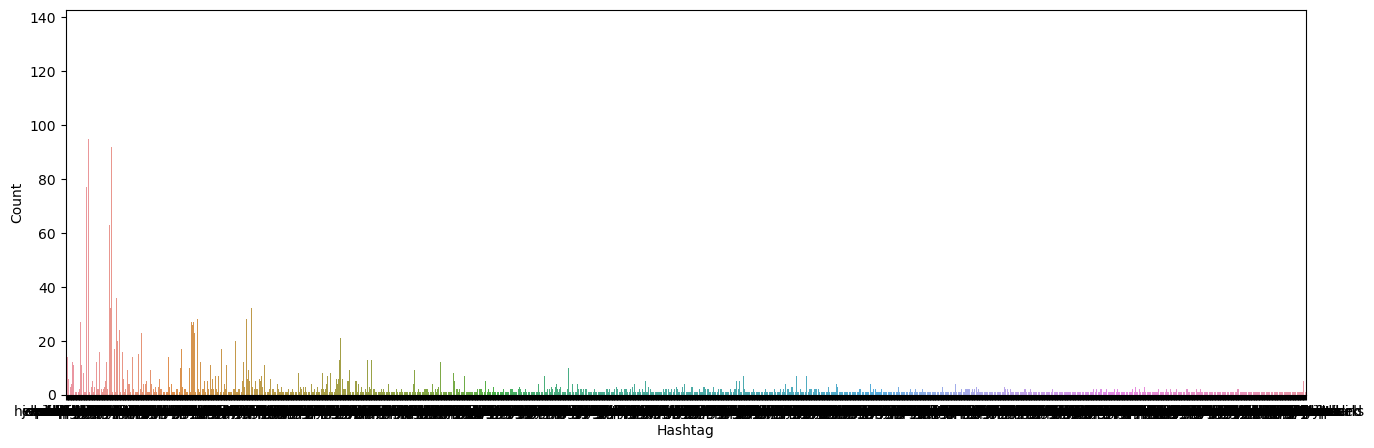

In [25]:
b=nltk.FreqDist(Ht_negative)
e=pd.DataFrame({'Hashtag':list(b.keys()),'Count':list(b.values())})
e.nlargest(columns='Count',n=20)
plt.figure(figsize=(16,5))
ax=sns.barplot(data=e,x='Hashtag',y='Count')
ax.set(ylabel='Count')
plt.show()

In [26]:
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer
import gensim

bow_vectorizer=CountVectorizer(max_df=.90,min_df=2,max_features=1000,stop_words='english')
bow=bow_vectorizer.fit_transform(commbo['tidy_tweet'])
bow.shape

(49159, 1000)

In [27]:
tdidf_vectorizer=TfidfVectorizer(max_df=.90,min_df=2,max_features=1000,stop_words='english')
tfidf=tdidf_vectorizer.fit_transform(commbo['tidy_tweet'])
tfidf.shape

(49159, 1000)

In [28]:
tokenized_tweet=commbo['tidy_tweet'].apply(lambda x:x.split())

model_w2v=gensim.models.Word2Vec(
    tokenized_tweet,
    vector_size=200,
    window=5,
    min_count=2,sg=1,hs=0,negative=10,workers=2,seed=34)
model_w2v.train(tokenized_tweet,total_examples=len(commbo['tidy_tweet']),epochs=20)

(6510028, 7536020)

In [29]:
model_w2v.wv.most_similar(positive="dinner")

[('spaghetti', 0.5545923709869385),
 ('melani', 0.5493491291999817),
 ('#avocado', 0.5442103147506714),
 ('#biall', 0.5394866466522217),
 ('#bihdaydinn', 0.5339696407318115),
 ('cookout', 0.528683602809906),
 ('gown', 0.524657666683197),
 ('aladdin', 0.5229383707046509),
 ('noodl', 0.5226365327835083),
 ('chili', 0.5167228579521179)]

In [30]:
model_w2v.wv.most_similar(positive='trump')

[('donald', 0.5667166709899902),
 ('hillari', 0.5362600684165955),
 ('phoni', 0.5337488651275635),
 ('#delegaterevolt', 0.5305753350257874),
 ('tomlin', 0.5219892263412476),
 ('melo', 0.5217661261558533),
 ('potu', 0.520514965057373),
 ('businessman', 0.5145408511161804),
 ('unstabl', 0.5120901465415955),
 ('nomine', 0.5037001967430115)]

In [31]:
def word_vector(tokens, size):
    vec = np.zeros(size)
    count = 0
    for word in tokens:
        try:
            vec += model_w2v.wv[word]
            count += 1
        except KeyError:
            continue

    if count != 0:
        vec /= count
    return vec          

In [32]:
wordvec_arrays=np.zeros((len(tokenized_tweet),200))
for i in range(len(tokenized_tweet)):
    wordvec_arrays[i,:]=word_vector(tokenized_tweet[i],200)
wordvec_df=pd.DataFrame(wordvec_arrays)
    
wordvec_df.shape    

(49159, 200)

- ### **DOC2VEC**

In [33]:
from tqdm import tqdm
tqdm.pandas(desc='progress-bar')
from gensim.models.doc2vec import TaggedDocument

In [34]:
def add_label(twt):
    output=[]
    for i,s in zip(twt.index,twt):
        output.append(TaggedDocument(s,['tweet_'+ str(i)]))
    return output

In [35]:
labled_tweets=add_label(tokenized_tweet)

In [36]:
labled_tweets[:6]

[TaggedDocument(words=['when', 'father', 'dysfunct', 'selfish', 'drag', 'kid', 'into', 'dysfunct', '#run'], tags=['tweet_0']),
 TaggedDocument(words=['thank', '#lyft', 'credit', 'caus', 'they', 'offer', 'wheelchair', 'van', '#disapoint', '#getthank'], tags=['tweet_1']),
 TaggedDocument(words=['bihday', 'your', 'majesti'], tags=['tweet_2']),
 TaggedDocument(words=['#model', 'love', 'take', 'with', 'time'], tags=['tweet_3']),
 TaggedDocument(words=['factsguid', 'societi', '#motiv'], tags=['tweet_4']),
 TaggedDocument(words=['huge', 'fare', 'talk', 'befor', 'they', 'leav', 'chao', 'disput', 'when', 'they', 'there', '#allshowandnogo'], tags=['tweet_5'])]

In [37]:
model_d2v =gensim.models.Doc2Vec(dm=1,
                                 dm_mean=1,
                                 vector_size=200
                                 ,window=5,negative=5,min_count=5,
                                 workers=3,alpha=.1,seed=23)

In [38]:
model_d2v.build_vocab([i for i in tqdm(labled_tweets)])
model_d2v.train(labled_tweets,total_examples=len(commbo['tidy_tweet']),epochs=15)

100%|██████████| 49159/49159 [00:00<00:00, 1966502.53it/s]


In [39]:
docvec_arrays=np.zeros((len(tokenized_tweet),200))
for i in range(len(commbo)):
    docvec_arrays[i,:]=model_d2v.docvecs[i].reshape((1,200))
docvec_df=pd.DataFrame(docvec_arrays)
docvec_df.shape

(49159, 200)

In [40]:
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score

# %%


In [41]:
train_bow=bow[:31962,:]
test_bow=bow[31962:,:]

In [42]:
x_trainbow,xvalid_bow,ytrain,yvalid=train_test_split(train_bow,train['label'],random_state=42,test_size=.3)
lreg=LogisticRegression()
lreg.fit(x_trainbow,ytrain)
prediction=lreg.predict_proba(xvalid_bow)
prediction_int=prediction[:,1] >=.3
prediction_int=prediction_int.astype(np.int)
f1_score(yvalid,prediction_int)

0.5303408146300915

In [43]:
test_pred=lreg.predict_proba(test_bow)
test_pred_int=test_pred[:,1] >=.3
test_pred_int=test_pred_int.astype(np.int)
test['label']=test_pred_int
submission=test[['id','label']]
submission.to_csv('sub_lreg_bow.csv',index=False)

TFIDF features

In [44]:
train_idfdf=tfidf[:31962,:]
test_idfdf=tfidf[31962:,:]


In [45]:
x_train_tfidf=train_idfdf[ytrain.index] 
xvalid_tfidf=train_idfdf[yvalid.index]

lreg.fit(x_train_tfidf,ytrain)
prediction=lreg.predict_proba(xvalid_tfidf)
prediction_int=prediction[:,1] >=.3
prediction_int=prediction_int.astype(np.int)
f1_score(yvalid,prediction_int)

0.5451327433628319

In [46]:
train_w2v =wordvec_df.iloc[:31962,:]
test_w2v=wordvec_df.iloc[31962:,:]
xtrain_w2v=train_w2v.iloc[ytrain.index,:]
xvalid_w2v=train_w2v.iloc[yvalid.index,:]

lreg.fit(xtrain_w2v,ytrain)
prediction=lreg.predict_proba(xvalid_w2v)
prediction_int=prediction[:,1] >=.3
prediction_int=prediction_int.astype(np.int)
f1_score(yvalid,prediction_int)

0.6275659824046921

In [47]:
train_d2v=docvec_df.iloc[:31962,:]
test_d2v=docvec_df.iloc[31962:,:]
xtrain_d2v=train_d2v.iloc[ytrain.index,:]
xvalid_d2v=train_d2v.iloc[yvalid.index,:]
lreg.fit(xtrain_d2v,ytrain)
prediction=lreg.predict_proba(xvalid_d2v)
prediction_int=prediction[:,1] >=.3
prediction_int=prediction_int.astype(np.int)
f1_score(yvalid,prediction_int)

0.3448888888888889

SVM 


In [48]:
from sklearn import svm

svc=svm.SVC(kernel='linear',C=1,probability=True).fit(x_trainbow,ytrain)
prediction=svc.predict_proba(xvalid_bow)
prediction_int=prediction[:,1] >=.3
prediction_int=prediction_int.astype(np.int)
f1_score(yvalid,prediction_int)

0.5097674418604652

In [49]:
test_pred=svc.predict_proba(test_bow)
test_pred_int=test_pred[:,1] >=.3
test_pred_int=test_pred_int.astype(np.int)
test['label']=test_pred_int
submission=test[['id','label']]
submission.to_csv('sub_svm_bow.csv',index=False)

In [50]:
svc=svm.SVC(kernel='linear',C=1,probability=True).fit(x_train_tfidf,ytrain)
prediction=svc.predict_proba(xvalid_tfidf)
prediction_int=prediction[:,1] >=.3
prediction_int=prediction_int.astype(np.int)
f1_score(yvalid,prediction_int)


0.5109489051094891

In [51]:
svc=svm.SVC(kernel='linear',C=1,probability=True).fit(xtrain_w2v,ytrain)
prediction=svc.predict_proba(xvalid_w2v)
prediction_int=prediction[:,1] >=.3
prediction_int=prediction_int.astype(np.int)
f1_score(yvalid,prediction_int)


0.6147859922178989

In [52]:
from xgboost import XGBClassifier

xgb_model=XGBClassifier(max_depth=6,n_estimators=1000).fit(x_trainbow,ytrain)
prediction=xgb_model.predict(xvalid_bow)
f1_score(yvalid,prediction)

0.5247706422018349

In [53]:
test_pred=xgb_model.predict(test_bow)
test['label']=test_pred
submission=test[['id','label']]
submission.to_csv('sub_xgb_bow.csv',index=False)

In [54]:
xgb_model=XGBClassifier(max_depth=6,n_estimators=1000,nthread=3).fit(xtrain_w2v,ytrain)
prediction=xgb_model.predict(xvalid_w2v)
f1_score(yvalid,prediction)


0.6582506762849414

*FineTuning*

In [55]:
import xgboost as xgb 
dtrain=xgb.DMatrix(xtrain_w2v,label=ytrain)
dvalid=xgb.DMatrix(xvalid_w2v,label=yvalid)
dtest=xgb.DMatrix(test_w2v)
params={'objective':'binary:logistic',
        'max_depth':6,
        'min_child_weight':1,
        'eta':3,
        'subsample':1,
        'colsample_bytree':1
        }


In [56]:
def custom_eval(preds,dtrain):
    labels=dtrain.get_label().astype(np.int)
    preds=(preds >=.3).astype(np.int)
    return [('f1_score',f1_score(labels,preds))]

In [58]:
gridsearch_params=[
    (max_depth,min_child_weight)
    for max_depth in range(6,10)
    for min_child_weight in range(5,8)
]
max_f1=0
best_params=None
for max_depth,min_child_weight in gridsearch_params:
    print("CV with max_depth={},min_child_weight={}".format(max_depth,min_child_weight))
    params['max_depth']=max_depth
    params['min_child_weight']=min_child_weight
    cv_results=xgb.cv(params,dtrain,feval=custom_eval,num_boost_round=200,maximize=True,seed=16,nfold=5,early_stopping_rounds=10)
mean_f1=cv_results['test-f1_score-mean'].max()
boost_rounds=cv_results['test-f1_score-mean'].argmax()
print("\tF1 Score {} for {} rounds".format(mean_f1,boost_rounds))
if mean_f1 > max_f1:
    max_f1=mean_f1
    best_params=(max_depth,min_child_weight)
print("Best params: {},{},F1 Score: {}".format(best_params[0],best_params[1],max_f1))


CV with max_depth=6,min_child_weight=5


c:\Users\Mytek\anaconda3\lib\site-packages\xgboost\training.py:39: UserWarning: `feval` is deprecated, use `custom_metric` instead.  They have different behavior when custom objective is also used.See https://xgboost.readthedocs.io/en/latest/tutorials/custom_metric_obj.html for details on the `custom_metric`.
  warnings.warn(


CV with max_depth=6,min_child_weight=6


c:\Users\Mytek\anaconda3\lib\site-packages\xgboost\training.py:39: UserWarning: `feval` is deprecated, use `custom_metric` instead.  They have different behavior when custom objective is also used.See https://xgboost.readthedocs.io/en/latest/tutorials/custom_metric_obj.html for details on the `custom_metric`.
  warnings.warn(


CV with max_depth=6,min_child_weight=7


c:\Users\Mytek\anaconda3\lib\site-packages\xgboost\training.py:39: UserWarning: `feval` is deprecated, use `custom_metric` instead.  They have different behavior when custom objective is also used.See https://xgboost.readthedocs.io/en/latest/tutorials/custom_metric_obj.html for details on the `custom_metric`.
  warnings.warn(


CV with max_depth=7,min_child_weight=5


c:\Users\Mytek\anaconda3\lib\site-packages\xgboost\training.py:39: UserWarning: `feval` is deprecated, use `custom_metric` instead.  They have different behavior when custom objective is also used.See https://xgboost.readthedocs.io/en/latest/tutorials/custom_metric_obj.html for details on the `custom_metric`.
  warnings.warn(


CV with max_depth=7,min_child_weight=6


c:\Users\Mytek\anaconda3\lib\site-packages\xgboost\training.py:39: UserWarning: `feval` is deprecated, use `custom_metric` instead.  They have different behavior when custom objective is also used.See https://xgboost.readthedocs.io/en/latest/tutorials/custom_metric_obj.html for details on the `custom_metric`.
  warnings.warn(


CV with max_depth=7,min_child_weight=7


c:\Users\Mytek\anaconda3\lib\site-packages\xgboost\training.py:39: UserWarning: `feval` is deprecated, use `custom_metric` instead.  They have different behavior when custom objective is also used.See https://xgboost.readthedocs.io/en/latest/tutorials/custom_metric_obj.html for details on the `custom_metric`.
  warnings.warn(


CV with max_depth=8,min_child_weight=5


c:\Users\Mytek\anaconda3\lib\site-packages\xgboost\training.py:39: UserWarning: `feval` is deprecated, use `custom_metric` instead.  They have different behavior when custom objective is also used.See https://xgboost.readthedocs.io/en/latest/tutorials/custom_metric_obj.html for details on the `custom_metric`.
  warnings.warn(


CV with max_depth=8,min_child_weight=6


c:\Users\Mytek\anaconda3\lib\site-packages\xgboost\training.py:39: UserWarning: `feval` is deprecated, use `custom_metric` instead.  They have different behavior when custom objective is also used.See https://xgboost.readthedocs.io/en/latest/tutorials/custom_metric_obj.html for details on the `custom_metric`.
  warnings.warn(


CV with max_depth=8,min_child_weight=7


c:\Users\Mytek\anaconda3\lib\site-packages\xgboost\training.py:39: UserWarning: `feval` is deprecated, use `custom_metric` instead.  They have different behavior when custom objective is also used.See https://xgboost.readthedocs.io/en/latest/tutorials/custom_metric_obj.html for details on the `custom_metric`.
  warnings.warn(


CV with max_depth=9,min_child_weight=5


c:\Users\Mytek\anaconda3\lib\site-packages\xgboost\training.py:39: UserWarning: `feval` is deprecated, use `custom_metric` instead.  They have different behavior when custom objective is also used.See https://xgboost.readthedocs.io/en/latest/tutorials/custom_metric_obj.html for details on the `custom_metric`.
  warnings.warn(


CV with max_depth=9,min_child_weight=6


c:\Users\Mytek\anaconda3\lib\site-packages\xgboost\training.py:39: UserWarning: `feval` is deprecated, use `custom_metric` instead.  They have different behavior when custom objective is also used.See https://xgboost.readthedocs.io/en/latest/tutorials/custom_metric_obj.html for details on the `custom_metric`.
  warnings.warn(


CV with max_depth=9,min_child_weight=7


c:\Users\Mytek\anaconda3\lib\site-packages\xgboost\training.py:39: UserWarning: `feval` is deprecated, use `custom_metric` instead.  They have different behavior when custom objective is also used.See https://xgboost.readthedocs.io/en/latest/tutorials/custom_metric_obj.html for details on the `custom_metric`.
  warnings.warn(


	F1 Score 0.44726360000000004 for 0 rounds
Best params: 9,7,F1 Score: 0.44726360000000004


In [60]:
params['max_depth']=8
params['min_child_weight']=6
params['subsample']=.9
params['colsample_bytree']=.5
params['eta']=.1




In [61]:
xgb_model=xgb.train(params,
                    dtrain,
                    feval=custom_eval,
                    num_boost_round=1000,
                    maximize=True,
                    evals=[(dvalid,'Validation')],
                    early_stopping_rounds=10)


c:\Users\Mytek\anaconda3\lib\site-packages\xgboost\training.py:39: UserWarning: `feval` is deprecated, use `custom_metric` instead.  They have different behavior when custom objective is also used.See https://xgboost.readthedocs.io/en/latest/tutorials/custom_metric_obj.html for details on the `custom_metric`.
  warnings.warn(


[0]	Validation-logloss:0.61634	Validation-f1_score:0.00000
[1]	Validation-logloss:0.55283	Validation-f1_score:0.12568
[2]	Validation-logloss:0.50023	Validation-f1_score:0.21790
[3]	Validation-logloss:0.45556	Validation-f1_score:0.25381
[4]	Validation-logloss:0.41744	Validation-f1_score:0.27034
[5]	Validation-logloss:0.38454	Validation-f1_score:0.28677
[6]	Validation-logloss:0.35570	Validation-f1_score:0.30600
[7]	Validation-logloss:0.33051	Validation-f1_score:0.33012
[8]	Validation-logloss:0.30822	Validation-f1_score:0.36428
[9]	Validation-logloss:0.28892	Validation-f1_score:0.38382
[10]	Validation-logloss:0.27203	Validation-f1_score:0.38665
[11]	Validation-logloss:0.25698	Validation-f1_score:0.41043
[12]	Validation-logloss:0.24395	Validation-f1_score:0.40454
[13]	Validation-logloss:0.23200	Validation-f1_score:0.41892
[14]	Validation-logloss:0.22154	Validation-f1_score:0.42953
[15]	Validation-logloss:0.21198	Validation-f1_score:0.43681
[16]	Validation-logloss:0.20413	Validation-f1_scor

In [62]:
test_pred=xgb_model.predict(dtest)
test['label']=(test_pred >=.3).astype(np.int)
submission=test[['id','label']]
submission.to_csv('sub_xgb_w2v_finetuned.csv',index=False)